In [393]:
import json
import pandas as pd
import numpy as np
import os
import re

pd.options.display.max_columns = 999

In [394]:
# load in wiki data
DSB_folder = os.getenv('DSB_PATH')

with open(f"{DSB_folder}8_ETL/wikipedia-movies.json", mode='r') as file:
    wiki_movies_raw = json.load(file)

In [395]:
len(wiki_movies_raw)

7311

In [396]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [397]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [398]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [399]:
# load in kaggle data
kaggle_metadata = pd.read_csv(f'{DSB_folder}8_ETL/movies_metadata.csv', low_memory=False)

ratings = pd.read_csv(f'{DSB_folder}8_ETL/ratings.csv')

In [400]:
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
39987,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.ecstasyoforder.com,91921,tt1836974,en,Ecstasy of Order: The Tetris Masters,A documentary that captures the greatest world...,1.180907,/gxJthn82rZOcf7MAhd3uQPOzT09.jpg,"[{'name': 'Reclusion Films', 'id': 72317}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-02-23,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Ecstasy of Order: The Tetris Masters,False,7.0,13.0
37199,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.zeroone.de/zero/index.php?id=267,65188,tt0406929,en,Leben nach Microsoft,Der Film portraitiert eine Gruppe von Microsof...,0.107603,/hmramms24guJz1rtuWL4LDTcjDk.jpg,"[{'name': 'Arte', 'id': 201}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2001-11-06,0.0,72.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Das Leben nach dem Goldrausch,Leben nach Microsoft,False,4.8,2.0
44844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,123229,tt2282849,fr,Les Kaïra,3 childhood friends who have never left their ...,9.754955,/8WO5Qw9QI7ola2cYXGymzJVpQxh.jpg,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Cin...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2012-07-11,103504.0,98.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Porn in the Hood,False,5.4,92.0
33387,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,198200,tt2787002,en,Jodi Arias: Dirty Little Secret,"True story based on Jodi Arias, a seductive 28...",1.110241,/gkKNDqrhGCI6JUE8lBo7yTEiEVM.jpg,"[{'name': 'PeaceOut Productions', 'id': 8899},...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-06-22,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Jodi Arias: Dirty Little Secret,False,4.0,13.0
17125,False,NaN,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",http://www.sonyclassics.com/midnightinparis,59436,tt1605783,en,Midnight in Paris,A romantic comedy about a family traveling to ...,11.43256,/xxSopLYATHXSepXcEaBh9Gazv6p.jpg,"[{'name': 'Gravier Productions', 'id': 1824}, ...","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",2011-05-11,151119219.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Midnight in Paris,False,7.4,2049.0


In [401]:
ratings.sample(5)

,userId,movieId,rating,timestamp
19178969,199169,97,3.5,1337440928
23416659,243157,104211,3.0,1485703655
18467249,191640,148626,4.0,1496002010
17434668,180926,7153,2.5,1493290580
17950589,186365,45730,4.5,1173275932


In [402]:
# messy raw df
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

#wiki_movies_df.head()

In [403]:
# get col names
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [404]:
# get only movies, no tv etc
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

len(wiki_movies)

7076

In [405]:
# raw df of movies
wiki_movies_df = pd.DataFrame(wiki_movies)

wiki_movies_df.head(3)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,Cinematography,Edited by,Productioncompany,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Genre,Theme music composer,Country of origin,Original language(s),Producer(s),Editor(s),Production company(s),Original network,Original release,Productioncompanies,Executive producer(s),Production location(s),Distributor,Picture format,Audio format,Voices of,Followed by,Composer(s),Created by,Preceded by,Adaptation by,Suggested by,Traditional,Mandarin,Released,Recorded,Venue,Length,Label,Director,Producer,Also known as,Animation by,Color process,Simplified,French,Screen story by,Hangul,Revised Romanization,McCune–Reischauer,Original title,Japanese,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay","[Cliff Eidelman, Yello]",Oliver Wood,Michael Tronick,Silver Pictures,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Maurice Jarre,Mark Plummer,Howard E. Smith,Avenue Pictures,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Charles Gross,Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[Carolco Pictures, IndieProd Company]",TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
def clean_movie(movie):
    
    movie = dict(movie) #create a non-destructive copy
    
    alt_titles = {}
    
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            # extract alt title
            movie.pop(key)
    
    
    if len(alt_titles) > 0:
        # set alt title to foreign lang title
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            # put data in column with new name
            movie[new_name] = movie.pop(old_name)
    
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [407]:
# iterate over the json
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [408]:
# new clean df
wiki_movies_df = pd.DataFrame(clean_movies)

# get col name list
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [409]:
# get just imdb movies

# in the raw string: () incl, tt match 2 lc t's, \d match digit, {7} match last thing (digit) 7 times
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

print(len(wiki_movies_df))

# get rid of dups by imdb ID
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)

print(len(wiki_movies_df))

wiki_movies_df.head(3)

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),Genre,Original language(s),Original network,Executive producer(s),Production location(s),Picture format,Audio format,Voices of,Followed by,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005


In [410]:
# track nulls per column

# list comprehension
#[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]
 
# add over 90% not null condition
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]


['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [411]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

# select for mostly not null columns
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [412]:
wiki_movies_df.head(3)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005


In [413]:
# parse the data--needs to be in correct format! (numeric etc)

wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [414]:
# need to change Box office, Budget, Running time to numeric; Release date to date

# make box_office df for testing
box_office = wiki_movies_df['Box office'].dropna()

In [415]:
# regular expressions only work on strings, so we need to make sue all values are strings

# func to check for non-strings
def is_not_a_string(x):
    return type(x) != str

# use map to apply
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [416]:
# lambda is better here as a one use func
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [417]:
# we have some lists in the data :(

# join the data if it is a list and has space between it
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [418]:
# now use regular expressions to fix the weird data (ie, 1.5 million instead of 1,500,000)
## regular expressions are strings of characters used as a search pattern
## they can test if strings are in a specific format or contain substring in specific format
### can also extract info and discard rest, or perform complex replacement of substrings

# special characters in regex:
##  \d - match any digit 0-9
##  \D - match any non-digit character
##  \w - match a word character (letter, digit, underscore)
##  \W - match any non-word character (anything else incl spaces)
##  \s - match any whitespace character (incl space, tab, \n)
##  \S - match any non-whitespace character

# character sets: defined by []
## special character sets:
###   "[a-z]" - match any lc letter
###   "[A-Z]" - match any uc letter
###   "[0-9]" - match any digit
###   "[a-zA-Z]" - match any letter
###   "[a-zA-Z0-9]" - match any alphanumeric character
####    ranges can be constrained like "[A-E]", "[1-3]" etc
####    we can use special characters inside ranges: "[a-zA-Z\d]" = "[a-zA-Z0-9]"
####    can use just characters to pick multiple unranged: ex "[mb]illion" for million/billion

# specify a character to NOT be included with ^

# . is a wildcard and will match any single character except line break
## to specificy an ACTUAL period, use \.

# \ is the escape character, turning anything after it into a regular character

# special counting characters: specify how many times character should show up
##  * means character can repeat any number of times, incl 0
###     ex: "ca*t" match "cat", "caaat", "fiCTion"
##  + means character can repeat any number of times more than 0
###     ex: "ca*t" match "cat", "caaat"
## {} for an exact number of times--can also be a range
###     ex: "ca{3}t" match "caaat", "ca{3,5}" match "caaat", "caaaat", "caaaaat"
##  ? for 1 or 0 times
###     ex: "ca?t" match "cat", "ct", "fiCTion"

# | for OR
## ex: "cat|dog" match "cat", "dog"

# string boundaries
## ^ for start of string
###     ex: "^cat" match "cat", "catatonic", NOT "tomcat"
##  $ for end of string
###     ex: "cat$" match "cat", "tomcat", NOT "catatonic"

# add a structure to the search
##  ex:  "\d{3}-\d{3}-\d{4}" would match any ###-###-#### phone number

# capture groups () can extract only parts of specified string:
##  ex: "(\d{3})-(\d{3})-(\d{4})" gets only digits of phone number, no hyphens

# non-capture groups uses (?:) for structure but does not capture 
## most useful for match and replace
###   ex: "(\d{3})-(?:\d{3})-(?:\d{4})" would return only area code

# negative lookahead groups (?!) are non-capture groups that check ahead and make sure string doesn't exist after match
## useful for checking to make sure we don't have similar but longer data being picked up
### ex: "(\d{3})-(\d{3})-(\d{4})(?!\d)" will pick up phone number 333-333-4444 but not user ID 333-333-44444

In [419]:
# build regex expression for budget
# dollar sign + one or more digits + optional decimal point + optional decimals + optional space(s) +  m/b illion
#form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [420]:
# get number of data points matching format (case insensitive)
#box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

In [421]:
# dollar sign + 1-3 digits + , followed by 3 digits (possibly repeated more than once)
#form_two = r'\$\d{1,3}(?:,\d{3})+'

In [422]:
# get number of data points matching format (case insensitive)
#box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

In [423]:
# find data points not in either form
#matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)

#matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

# does not match either with ~ negative operator
#box_office[~matches_form_one & ~matches_form_two]

In [424]:
# fix pattern matches

# get rid of space between dollar sign and number by adding \s* after dollar sign
#form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
#form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

# some values have period as thousands separator, change with [,\.]
## only want it to apply to ones NOT formatted as [mb]illion (ie, 1.234 million)
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# some values given as range--starts with $ and ends with -
## replace with just $
### to replace dash we need hyphen, em dash, en dash
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

# million misspelled as 'millon'
## make second i optional with ?
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'


In [425]:
# extract and convert box office values

# extract() rturns dataframe where every column is the data that matches the capture group(s)
## our f string specifies match form_one or form_two
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [426]:
# function to convert to standard numeric

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [427]:
# extract and apply function
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [428]:
# drop old column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [429]:
# parse budget data

# create budget var
budget = wiki_movies_df['Budget'].dropna()

In [430]:
# covert lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [431]:
# remove value between $ and hyphen for budget ranges
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [432]:
# apply previous forms
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)

budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [433]:
# need to remove citation #'s in []
budget = budget.str.replace(r'\[\d+\]\s*', '')

budget[~matches_form_one & ~matches_form_two]

C:\Users\charl\AppData\Local\Temp\ipykernel_7344\4176983206.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [434]:
# apply function
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [435]:
# drop original column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [436]:
# parse release date

# hold nonnull values convert lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [437]:
# create regex forms

# month, dd, yyyy
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
# yyyy-mm-dd and yyyy/mm/dd
date_form_two = r'\d{4}.[01]\d.[0123]\d'
# month yyyy
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
# yyyy
date_form_four = r'\d{4}'

In [438]:
# extract dates 
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [439]:
# use pd.to_datetime() to convert, setting infer_datetime_format=True since there are multiple date formats
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


In [441]:
# drop original column
wiki_movies_df.drop('Release date', axis=1, inplace=True)

In [442]:
# parse running time

# var to hold nonnull values convert list to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [443]:
# how many are in # minutes format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [444]:
# see what the rest look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [445]:
# only mark beg of string and accept other abbrev of minutes with letter 'm'
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [446]:
# the stragglers
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [447]:
# hour + minute pattern: "\d+\s*ho?u?r?s?\s*\d*"

# extract either minute or hour + minute values 
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [448]:
# convert to numeric
## coerce=True to account for empty strings turns them to Nan, then fill with 0
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [449]:
# lambda function to covert hour + minute to minutes if pure minutes = 0
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [450]:
# drop original column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [451]:
wiki_movies_df.head(3)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Country,Language,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,United States,English,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,United States,English,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,United States,"[English, Lao]",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0,1990-08-10,113.0


In [452]:
# clean the kaggle data

kaggle_metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [453]:
# check for bad data in boolean
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [454]:
# look at bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
# drop porno movies then drop adult column
## this will also catch our bad data
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [456]:
# check video boolean
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [457]:
# set video to True
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [458]:
# convert cols to numeric
## errors raise will tell us what cannot be converted if anything
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [459]:
# convert datetime cols
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [460]:
# check ratings data for excessive nulls
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\charl\AppData\Local\Temp\ipykernel_7344\1817729965.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


In [462]:
# convert timestamp from unix to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

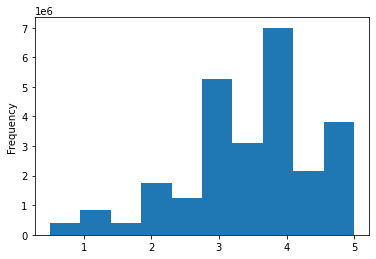

In [463]:
# check histogram distribution of ratings
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()